## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [3]:
import pandas as pd

df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
rows, columns = df.shape
rows, columns

(10683, 11)

## Q2: What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

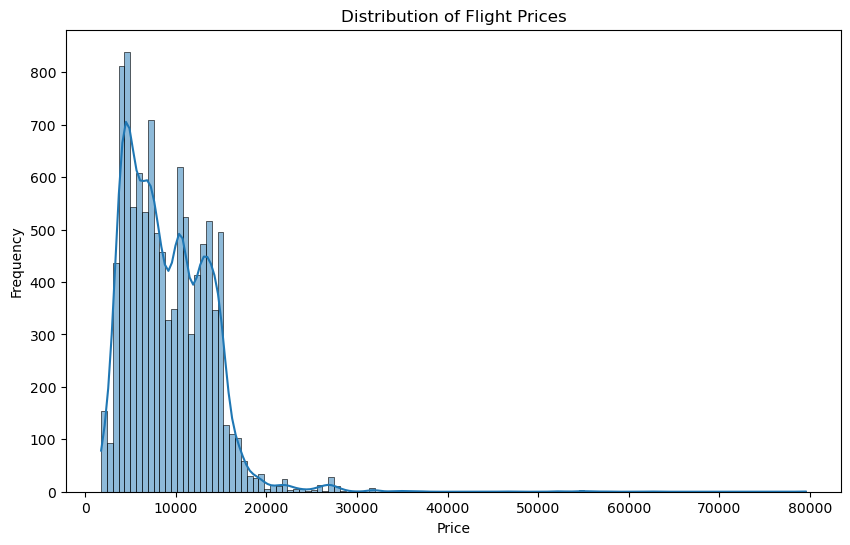

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Q3: What is the range of prices in the dataset? What is the minimum and maximum price?

In [7]:
min_price = df['Price'].min()
max_price = df['Price'].max()
min_price, max_price


(1759, 79512)

## Q4: How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

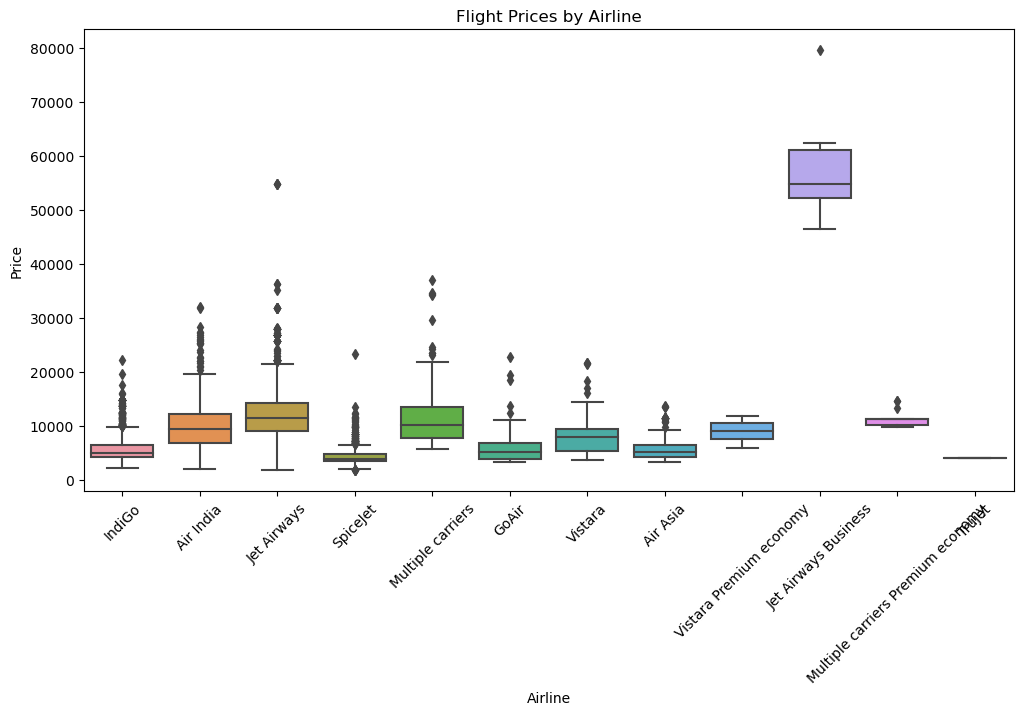

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


## Q5: Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

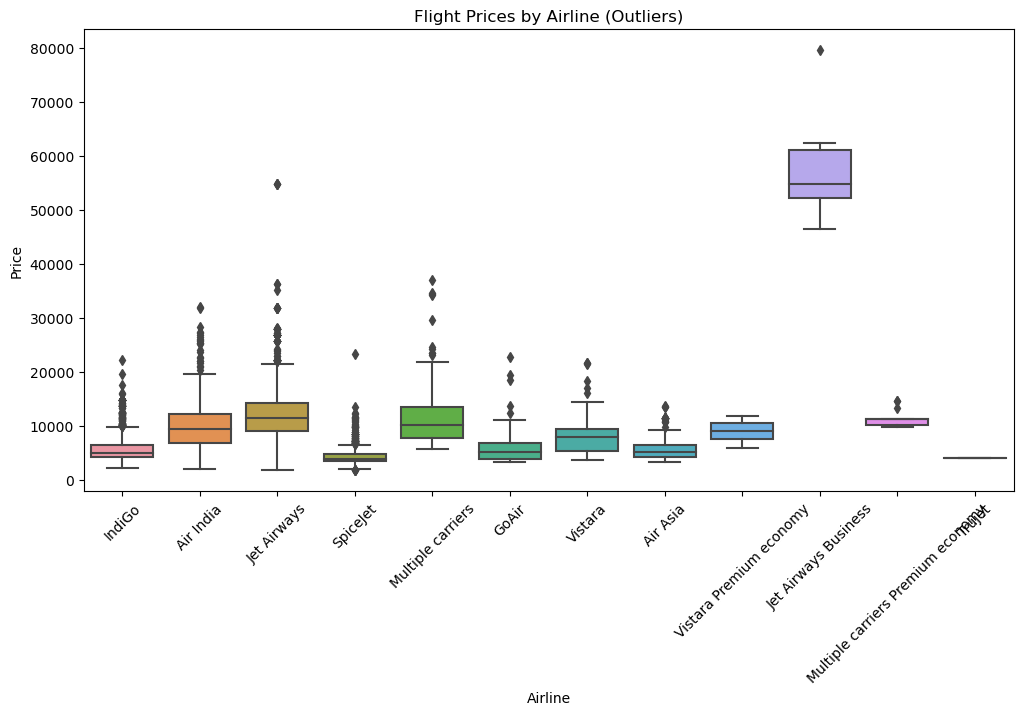

(527, 11)

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline (Outliers)')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

outliers = df[df['Price'] > df['Price'].quantile(0.95)]
outliers.shape


## Q6: You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

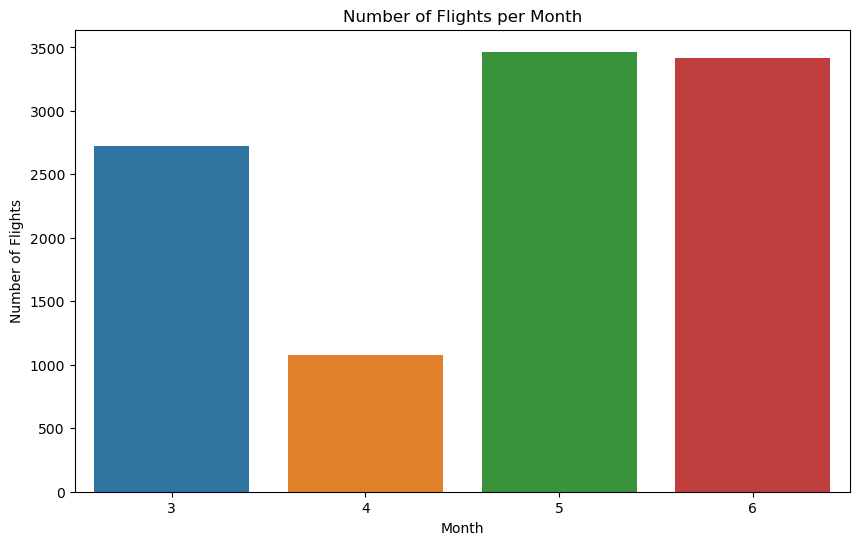

3    2724
4    1079
5    3466
6    3414
Name: Month, dtype: int64

In [11]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Month'] = df['Date_of_Journey'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

monthly_flights = df['Month'].value_counts().sort_index()
monthly_flights


## Q7: You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

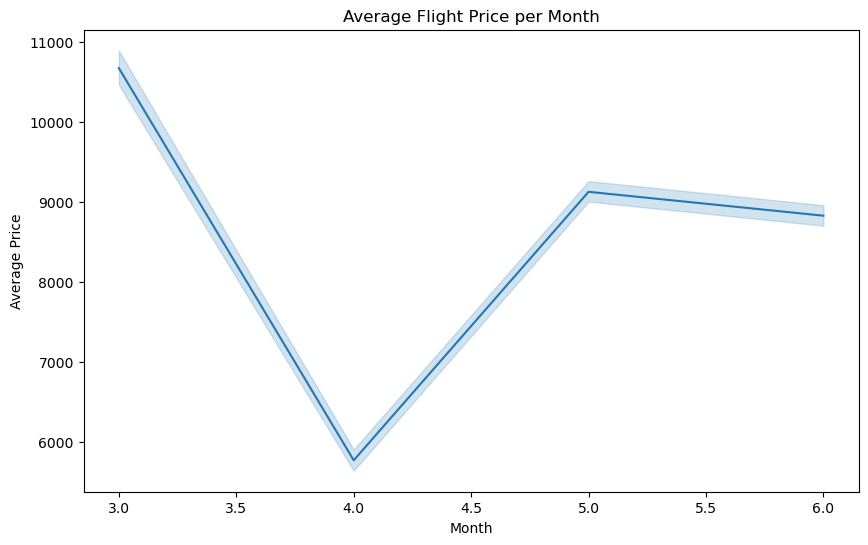

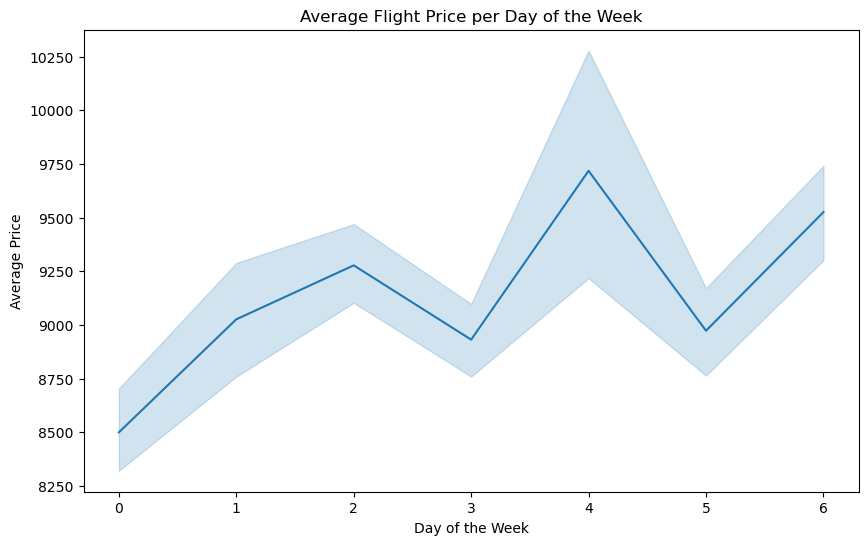

(Month
 3    10673.205580
 4     5770.847081
 5     9127.247548
 6     8828.796134
 Name: Price, dtype: float64,
 Day_of_Week
 0    8499.530811
 1    9026.149597
 2    9277.514190
 3    8931.379367
 4    9717.996700
 5    8972.905389
 6    9525.508820
 Name: Price, dtype: float64)

In [12]:
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price', data=df)
plt.title('Average Flight Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Day_of_Week', y='Price', data=df)
plt.title('Average Flight Price per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.show()

monthly_avg_price = df.groupby('Month')['Price'].mean()
weekly_avg_price = df.groupby('Day_of_Week')['Price'].mean()
monthly_avg_price, weekly_avg_price


## Q8: You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

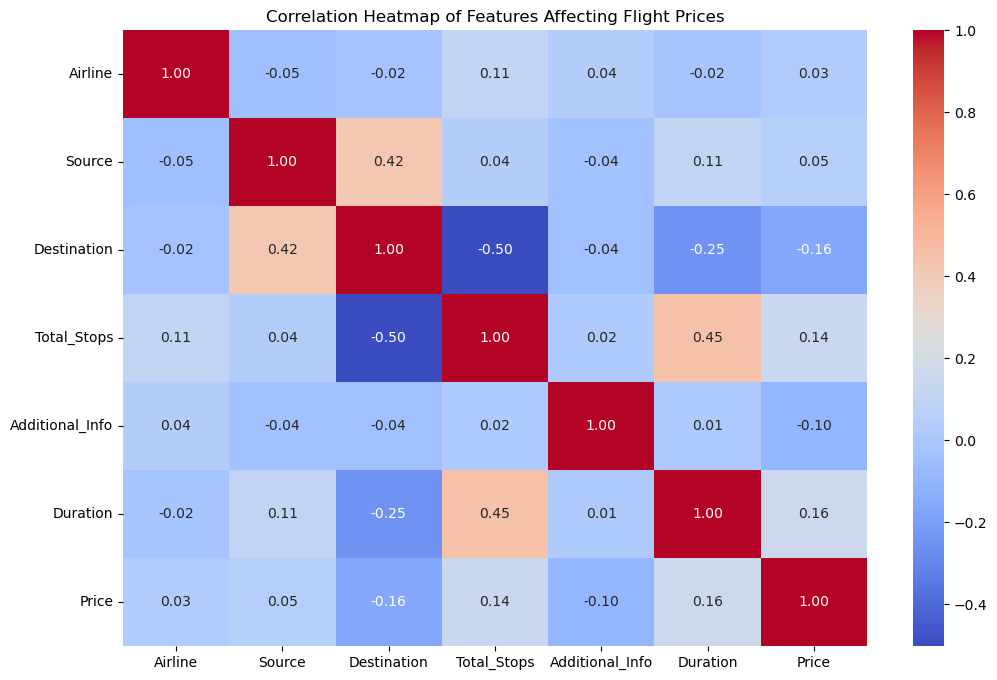

Price              1.000000
Duration           0.158719
Total_Stops        0.140225
Source             0.049130
Airline            0.031046
Additional_Info   -0.095630
Destination       -0.162697
Name: Price, dtype: float64

In [13]:
features_to_analyze = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Duration']

plt.figure(figsize=(12, 8))
correlation_matrix = df[features_to_analyze + ['Price']].apply(lambda col: col.factorize()[0]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features Affecting Flight Prices')
plt.show()

correlation_matrix['Price'].sort_values(ascending=False)


## Q9: Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
df.shape

(10841, 13)

## Q10: How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

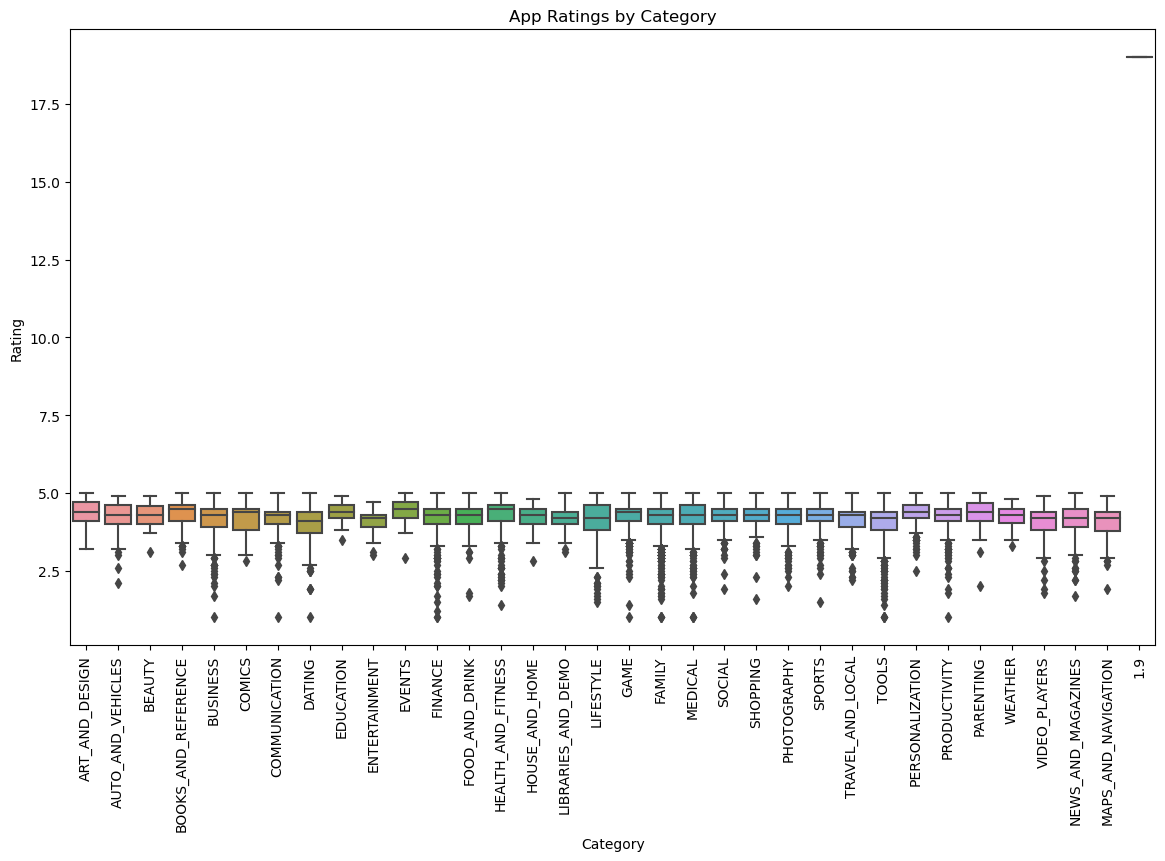

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


## Q11: Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

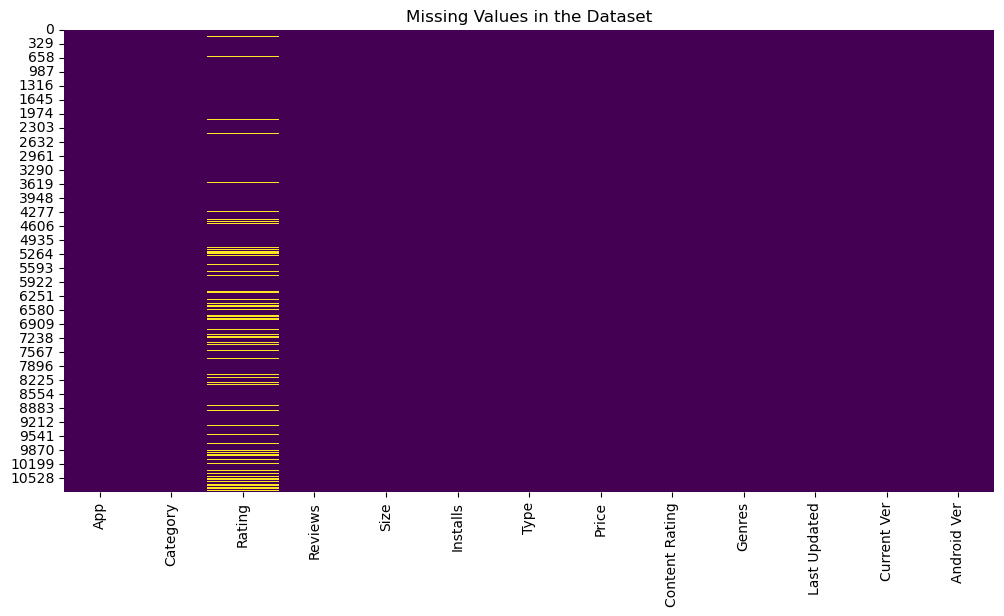

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
missing_values = df.isnull().sum()
missing_values

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()


missing_values


## Q12: What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

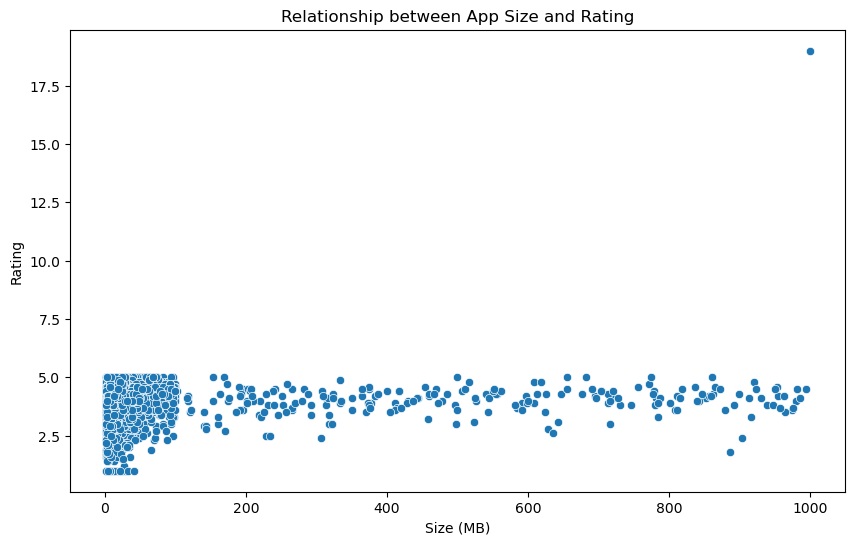

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Size'] = df['Size'].replace('Varies with device', None)

df['Size'] = df['Size'].astype(str)

df['Size'] = df['Size'].str.replace(',', '').str.replace('+', '')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('Relationship between App Size and Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()


## Q13: How does the type of app affect its price? Create a bar chart to compare average prices by app type.

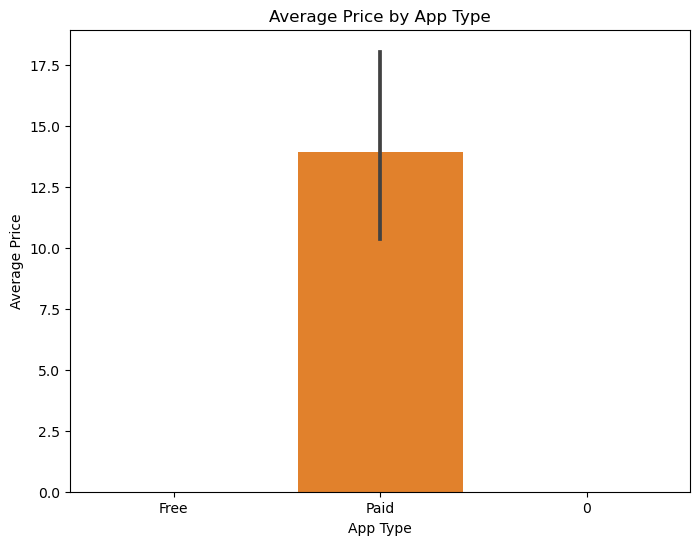

In [31]:
df['Price'] = df['Price'].str.replace('$', '')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Price', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()


## Q14: What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [33]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')

df['Installs'] = df['Installs'].replace('Free', '0')

df['Installs'] = df['Installs'].astype(int)

top_10_apps = df.nlargest(10, 'Installs')[['App', 'Installs']]
print(top_10_apps)


                                          App    Installs
152                         Google Play Books  1000000000
335  Messenger – Text and Video Chat for Free  1000000000
336                        WhatsApp Messenger  1000000000
338              Google Chrome: Fast & Secure  1000000000
340                                     Gmail  1000000000
341                                  Hangouts  1000000000
381                        WhatsApp Messenger  1000000000
382  Messenger – Text and Video Chat for Free  1000000000
386                                  Hangouts  1000000000
391             Skype - free IM & video calls  1000000000


## Q15: A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

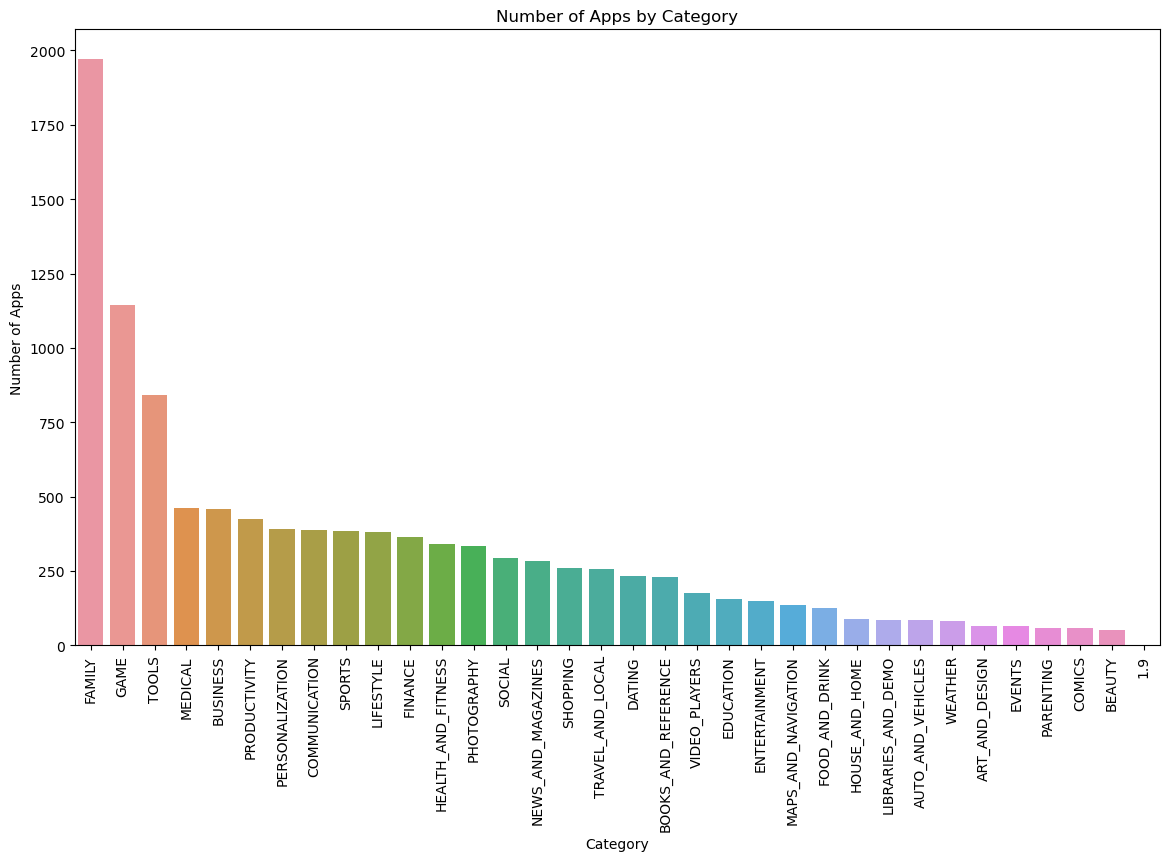

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

category_counts = df['Category'].value_counts()
category_counts


## Q16: A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

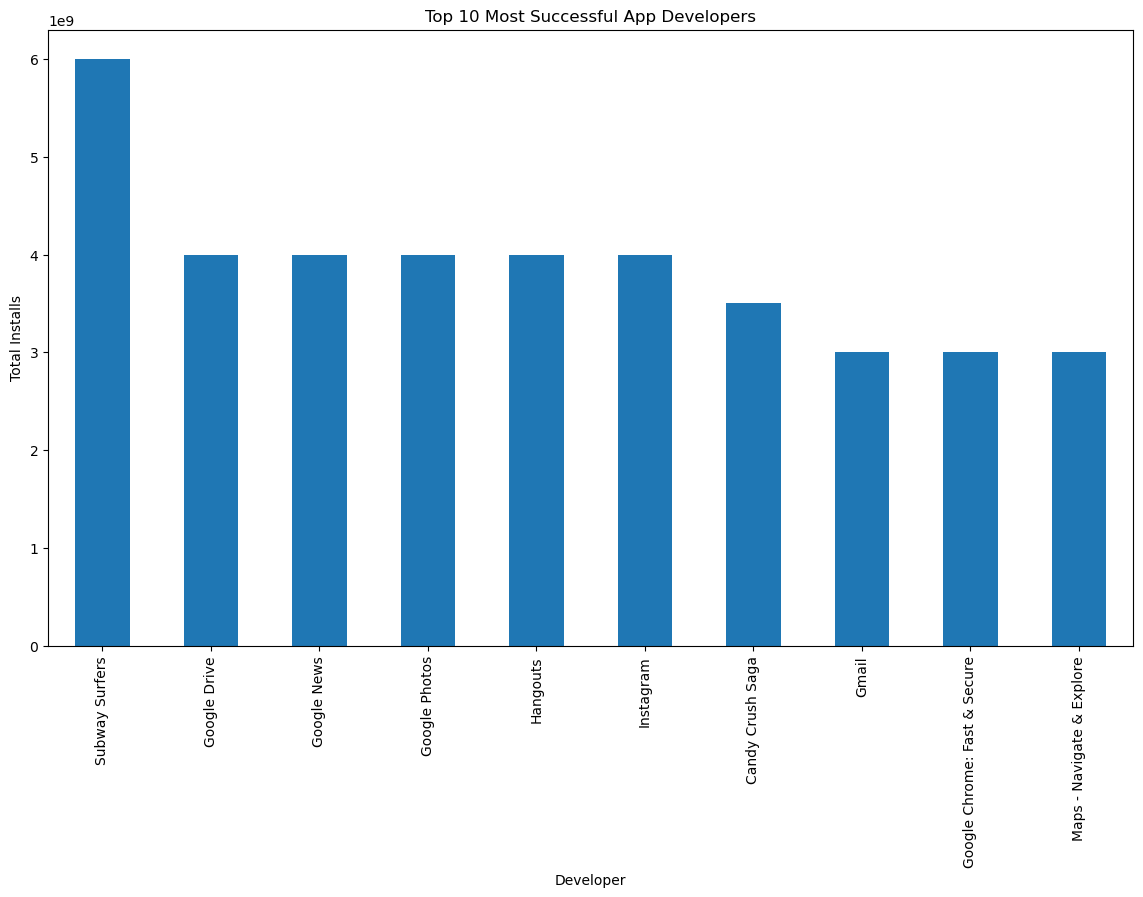

App
Subway Surfers                  6000000000
Google Drive                    4000000000
Google News                     4000000000
Google Photos                   4000000000
Hangouts                        4000000000
Instagram                       4000000000
Candy Crush Saga                3500000000
Gmail                           3000000000
Google Chrome: Fast & Secure    3000000000
Maps - Navigate & Explore       3000000000
Name: Installs, dtype: int64

In [35]:
developer_success = df.groupby('App')['Installs'].sum().nlargest(10)
plt.figure(figsize=(14, 8))
developer_success.plot(kind='bar')
plt.title('Top 10 Most Successful App Developers')
plt.xlabel('Developer')
plt.ylabel('Total Installs')
plt.show()

developer_success


## Q17: A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

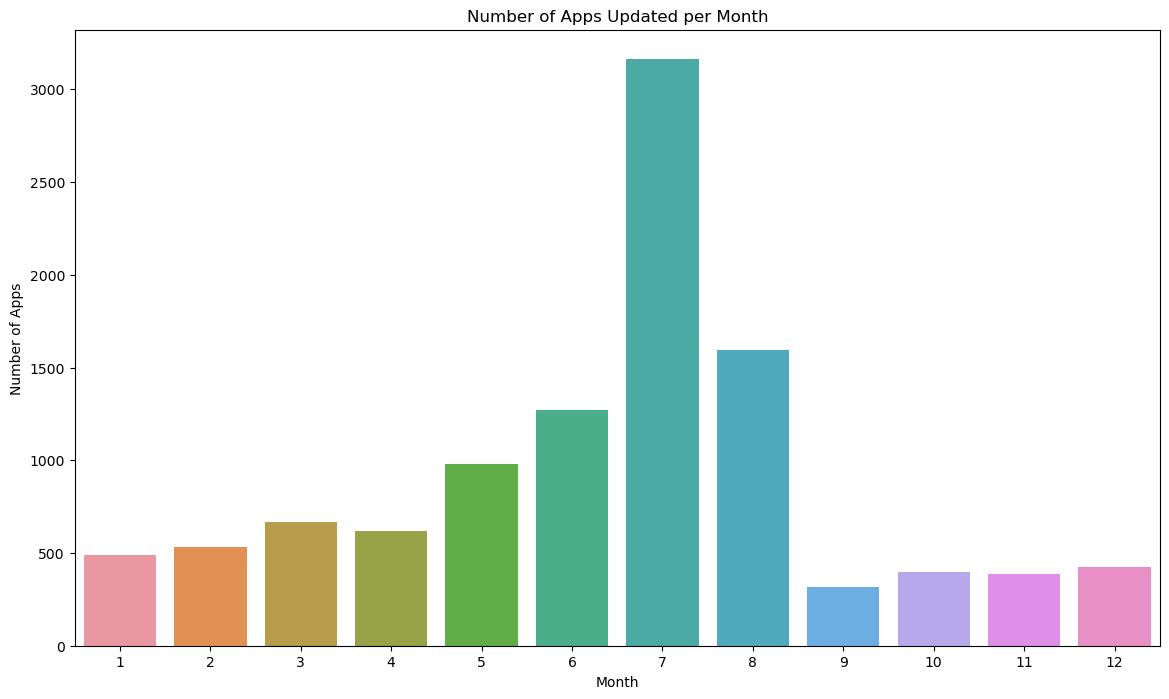

1      491
2      533
3      667
4      616
5      978
6     1273
7     3163
8     1594
9      314
10     398
11     387
12     426
Name: Last Updated Month, dtype: int64


In [37]:
df = df.dropna(subset=['Last Updated'])  

df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

df = df.dropna(subset=['Last Updated'])

df['Last Updated Month'] = df['Last Updated'].dt.month

plt.figure(figsize=(14, 8))
sns.countplot(x='Last Updated Month', data=df)
plt.title('Number of Apps Updated per Month')
plt.xlabel('Month')
plt.ylabel('Number of Apps')
plt.show()

updated_month_counts = df['Last Updated Month'].value_counts().sort_index()
print(updated_month_counts)
